In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-data-cleaned-csv/HR_Data_Cleaned.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-data-cleaned-csv/HR_Data_Cleaned.csv


In [4]:
#load the dataset.
df = pd.read_csv("/kaggle/input/hr-data-cleaned-csv/HR_Data_Cleaned.csv")

## EDA

In [5]:
#EDA sections
print(f"Description: \n{df.describe(include="all")}")

Description: 
       attrition business_travel cf_age_band cf_attrition_label department  \
count       1470            1470        1470               1470       1470   
unique         2               3           5                  2          3   
top           No   Travel_Rarely     25 - 34  Current Employees        R&D   
freq        1233            1043         554               1233        961   
mean         NaN             NaN         NaN                NaN        NaN   
std          NaN             NaN         NaN                NaN        NaN   
min          NaN             NaN         NaN                NaN        NaN   
25%          NaN             NaN         NaN                NaN        NaN   
50%          NaN             NaN         NaN                NaN        NaN   
75%          NaN             NaN         NaN                NaN        NaN   
max          NaN             NaN         NaN                NaN        NaN   

       education_field      emp_no  employee_numb

In [6]:
print(df.head())

  attrition    business_travel cf_age_band cf_attrition_label department  \
0       Yes      Travel_Rarely     35 - 44       Ex-Employees      Sales   
1        No  Travel_Frequently     45 - 54  Current Employees        R&D   
2       Yes      Travel_Rarely     35 - 44       Ex-Employees        R&D   
3        No  Travel_Frequently     25 - 34  Current Employees        R&D   
4        No      Travel_Rarely     25 - 34  Current Employees        R&D   

  education_field   emp_no  employee_number  gender               job_role  \
0   Life Sciences  STAFF-1                1  Female        Sales Executive   
1   Life Sciences  STAFF-2                2    Male     Research Scientist   
2           Other  STAFF-4                4    Male  Laboratory Technician   
3   Life Sciences  STAFF-5                5  Female     Research Scientist   
4         Medical  STAFF-7                7    Male  Laboratory Technician   

   ... performance_rating relationship_satisfaction standard_hours  \
0  .

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   attrition                   1470 non-null   object
 1   business_travel             1470 non-null   object
 2   cf_age_band                 1470 non-null   object
 3   cf_attrition_label          1470 non-null   object
 4   department                  1470 non-null   object
 5   education_field             1470 non-null   object
 6   emp_no                      1470 non-null   object
 7   employee_number             1470 non-null   int64 
 8   gender                      1470 non-null   object
 9   job_role                    1470 non-null   object
 10  marital_status              1470 non-null   object
 11  over_time                   1470 non-null   object
 12  over18                      1470 non-null   object
 13  training_times_last_year    1470 non-null   int6

## Attrition Overview

attrition
No     1233
Yes     237
Name: count, dtype: int64


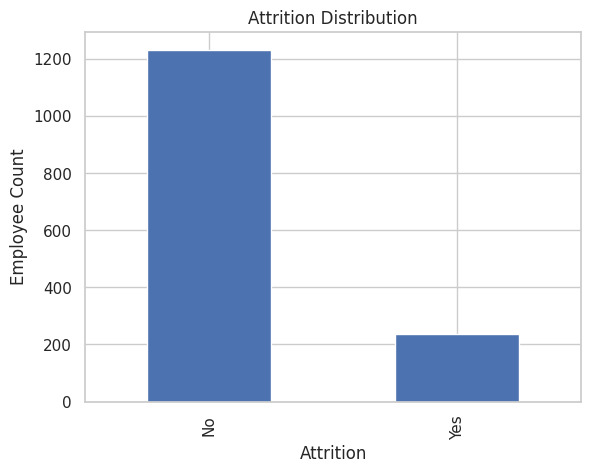

In [8]:
if "attrition" in df.columns:
    attrition_counts = df['attrition'].value_counts()
    print(attrition_counts)
if "attrition" in df.columns:
    attrition_counts.plot(kind="bar")
    plt.title("Attrition Distribution")
    plt.xlabel("Attrition")
    plt.ylabel("Employee Count")
    plt.show()

## Demographic Analysis

### Attrition by Gender

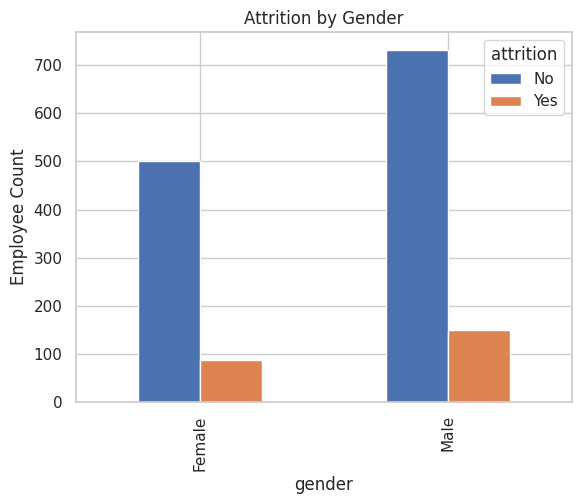

In [9]:
if set(["attrition", "gender"]).issubset(df.columns):
    pd.crosstab(df["gender"], df["attrition"]).plot(kind="bar")
    plt.title("Attrition by Gender")
    plt.ylabel("Employee Count")
    plt.show()
else:
    print("Requires Columns are not found")

### Age Distribution by Attrition

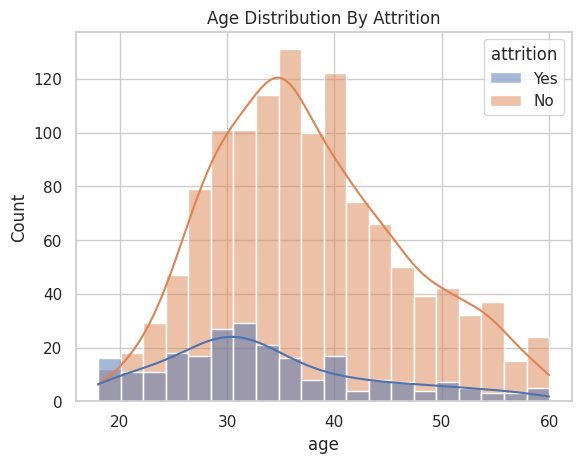

In [10]:
if set(["age", "attrition"]).issubset(df.columns):
    sns.histplot(data=df, x="age", hue="attrition", bins=20, kde=True)
    plt.title("Age Distribution By Attrition")
    plt.show()

### Job Role and Department Analysis

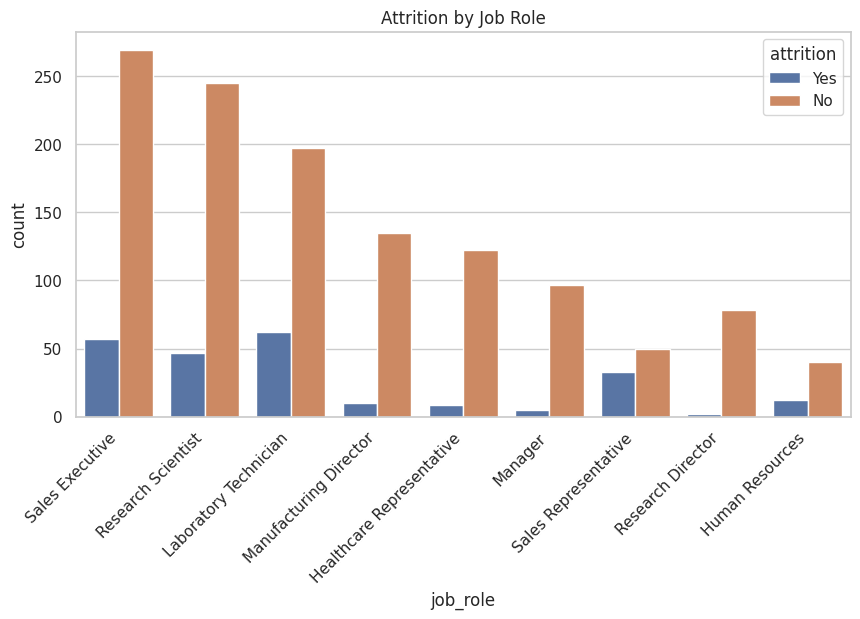

In [11]:
if set(["job_role", "attrition"]).issubset(df.columns):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x="job_role", hue="attrition")
    plt.xticks(rotation=45, ha="right")
    plt.title("Attrition by Job Role")
    plt.show()
else:
    print("Required Columns are not found")

### Satisfaction and Work Factors

In [12]:
satisfaction_cols = [c for c in df.columns if "satisfaction" in c]
print(satisfaction_cols)

['environment_satisfaction', 'job_satisfaction', 'relationship_satisfaction']


In [13]:
if "attrition" in df.columns and satisfaction_cols:
    sat_mean = df.groupby("attrition")[satisfaction_cols].mean()
    print(sat_mean)

           environment_satisfaction  job_satisfaction  \
attrition                                               
No                         2.771290          2.778589   
Yes                        2.464135          2.468354   

           relationship_satisfaction  
attrition                             
No                          2.733982  
Yes                         2.599156  


### Education and Experience

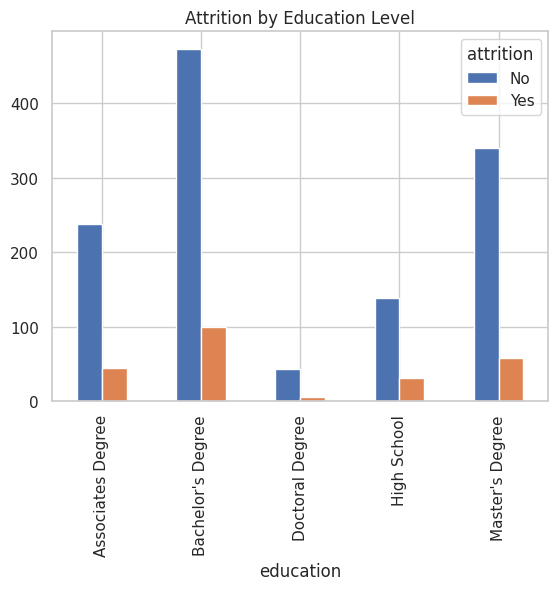

In [14]:
if set(["education", "attrition"]).issubset(df.columns):
    pd.crosstab(df["education"], df["attrition"]).plot(kind="bar")
    plt.title("Attrition by Education Level")
    plt.show()

# Key Observations
- Attrition is not evenly distributed across roles and demographics.
- Certain job roles and age groups show higher turnover patterns.
- Satisfaction-related variables often differ between employees who leave and those who stay.